In [15]:
import numpy as np
import matplotlib.pyplot as plt

class Elbow:
    def __init__(self, w, l): #wは体質量，lは前腕の長さ
        self.__g = 9.8
        beta, load = 0, 0 #デフォルト肩屈曲角:0°，デフォルト負荷:0kg
        m = w * 0.025 #前腕と手の質量
        d = l * 0.125 #肘関節からの上腕筋の腱が付いている場所の距離
        h = l * 0.5 #肘関節から前腕と手の重心までの距離
        self.parameters = np.array([w, m, d, h, l, beta, load]) #betaは肩屈曲角, loadは錘質量

    def get_parameters(self):
        print('体質量　: %s(kg)' % self.parameters[0])
        print('前腕質量: %s(kg)' % self.parameters[1])
        print('前腕長　: %s(m)' % self.parameters[4])
        print('肩屈曲角: %s(degrees)' % self.parameters[5])
        print('負荷　　: %s(kg)' % self.parameters[6])
              
    def shoulder_flection_angle(self, new_angle): #肩屈曲角の変更
        self.parameters[5] = new_angle
    
    def load(self, new_M): #錘質量の変更
        self.parameters[6] = new_M

    def M_z(self, theta):
        m = self.parameters[1]
        h = self.parameters[3]
        l = self.parameters[4]
        beta = self.parameters[5]
        M = self.parameters[6]
        return self.__g * (m*h + M*l) * np.sin(np.radians(beta) + np.radians(theta))

    def F(self, theta):
        d = self.parameters[2]
        return self.M_z(theta) / (d * np.sin(np.radians(theta)))

    def F_x(self, theta):
        beta = self.parameters[5]
        return -self.F(theta) * np.sin(np.radians(beta))

    def F_y(self, theta):
        beta = self.parameters[5]
        return self.F(theta) * np.cos(np.radians(beta))

    def R_x(self, theta):
        beta = self.parameters[5]
        return -self.F_x(theta)

    def R_y(self, theta):
        m = self.parameters[1]
        M = self.parameters[6]
        return (m + M)*self.__g - self.F_y(theta)

    def R(self, theta):
        return np.sqrt(self.R_x(theta)**2 + self.R_y(theta)**2)

    def allowed_angles(self):
        beta = self.parameters[5]
        if beta < 45:
            angles = np.arange(10, 136, 1)
        else:
            angles = np.arange(10, 180-beta, 1)
        return angles



def do_calc():
    w = float(input('体質量(kg)を入力してください: '))
    l = float(input('前腕長(m)を入力してください : '))
    M = float(input('錘質量(kg)を入力してください: '))
    beta= float(input('肩屈曲角(degrees)を入力してください: '))
    theta = float(input('肘屈曲角(degrees)を入力してください: '))
    if beta < 0 or theta < 10 or (beta + theta) >= 180:
        print('計算ストップ：不正な角です.')
    else:
        obj = Elbow(w, l)
        obj.shoulder_flection_angle(beta)
        obj.load(M)
        print('------------------')
        print('【計算結果】')
        print('肘関節モーメントの大きさ(Nm): %s' % obj.M_z(theta))
        print('上腕筋の力の大きさ(N)      : %s' % obj.F(theta))
        print('肘関節抗力の大きさ(N)      : %s' % obj.R(theta))
        print('上腕筋の力のベクトル(N)     : %s' % array([obj.F_x(theta), obj.F_y(theta)]))
        print('肘関節抗力のベクトル(N)     : %s' % array([obj.R_x(theta), obj.R_y(theta)]))

def draw_effects():
    w = float(input('体質量(kg)を入力してください: '))
    l = float(input('前腕長(m)を入力してください : '))
    M = float(input('錘質量(kg)を入力してください: '))
    beta = float(input('肩屈曲角(degrees)を入力してください: '))
    obj = Elbow(w, l)
    obj.shoulder_flection_angle(beta)
    obj.load(M)
    angles = obj.allowed_angles()
    '''
    if beta < 45:
        angles = np.arange(10, 136, 1)
    else:
        angles = np.arange(10, 180-beta, 1)
    '''
    #肘関節モーメントのグラフ
    plt.figure()
    plt.plot(angles, obj.M_z(angles))
    plt.xlabel('Flection angles of elbow (degrees)')
    plt.ylabel('Moment of force around elbow (Nm)')
    #前腕筋力のグラフ
    plt.figure()
    plt.plot(angles, obj.F(angles))
    plt.xlabel('Flection angles of elbow (degrees)')
    plt.ylabel('Force of forearm mascle (N)')
    #肘関節筋力のグラフ
    plt.figure()
    plt.plot(angles, obj.R(angles))
    plt.xlabel('Flection angles of elbow (degrees)')
    plt.ylabel('Resistance of elbow (N)')

体質量(kg)を入力してください: 45
前腕長(m)を入力してください : .45
錘質量(kg)を入力してください: 5
肩屈曲角(degrees)を入力してください: 23


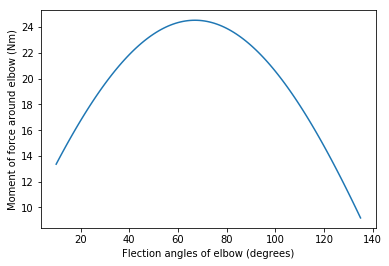

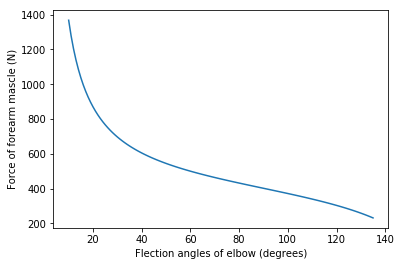

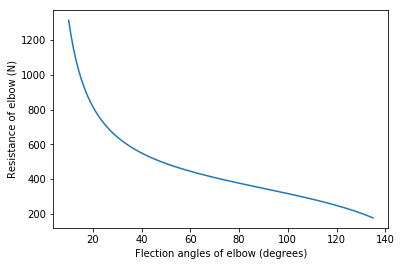

In [16]:
draw_effects()

In [19]:
subject0 = Elbow(60, .41)

In [20]:
subject0.get_parameters()

体質量　: 60.0(kg)
前腕質量: 1.5(kg)
前腕長　: 0.41(m)
肩屈曲角: 0.0(degrees)
負荷　　: 0.0(kg)


In [21]:
subject0.load(3.5)
subject0.shoulder_flection_angle(11.5)

In [22]:
subject0.get_parameters()

体質量　: 60.0(kg)
前腕質量: 1.5(kg)
前腕長　: 0.41(m)
肩屈曲角: 11.5(degrees)
負荷　　: 3.5(kg)


In [23]:
subject0.F_x(60)

-72.742170279779515

In [24]:
for i in range(0, 90, 10):
    subject0.F_y(i)

357.53918970603712